In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Change filepath if necessary
dataset = pd.read_csv('/Users/housing.csv')
dataset.head(2)


,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [3]:
dataset.describe()

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


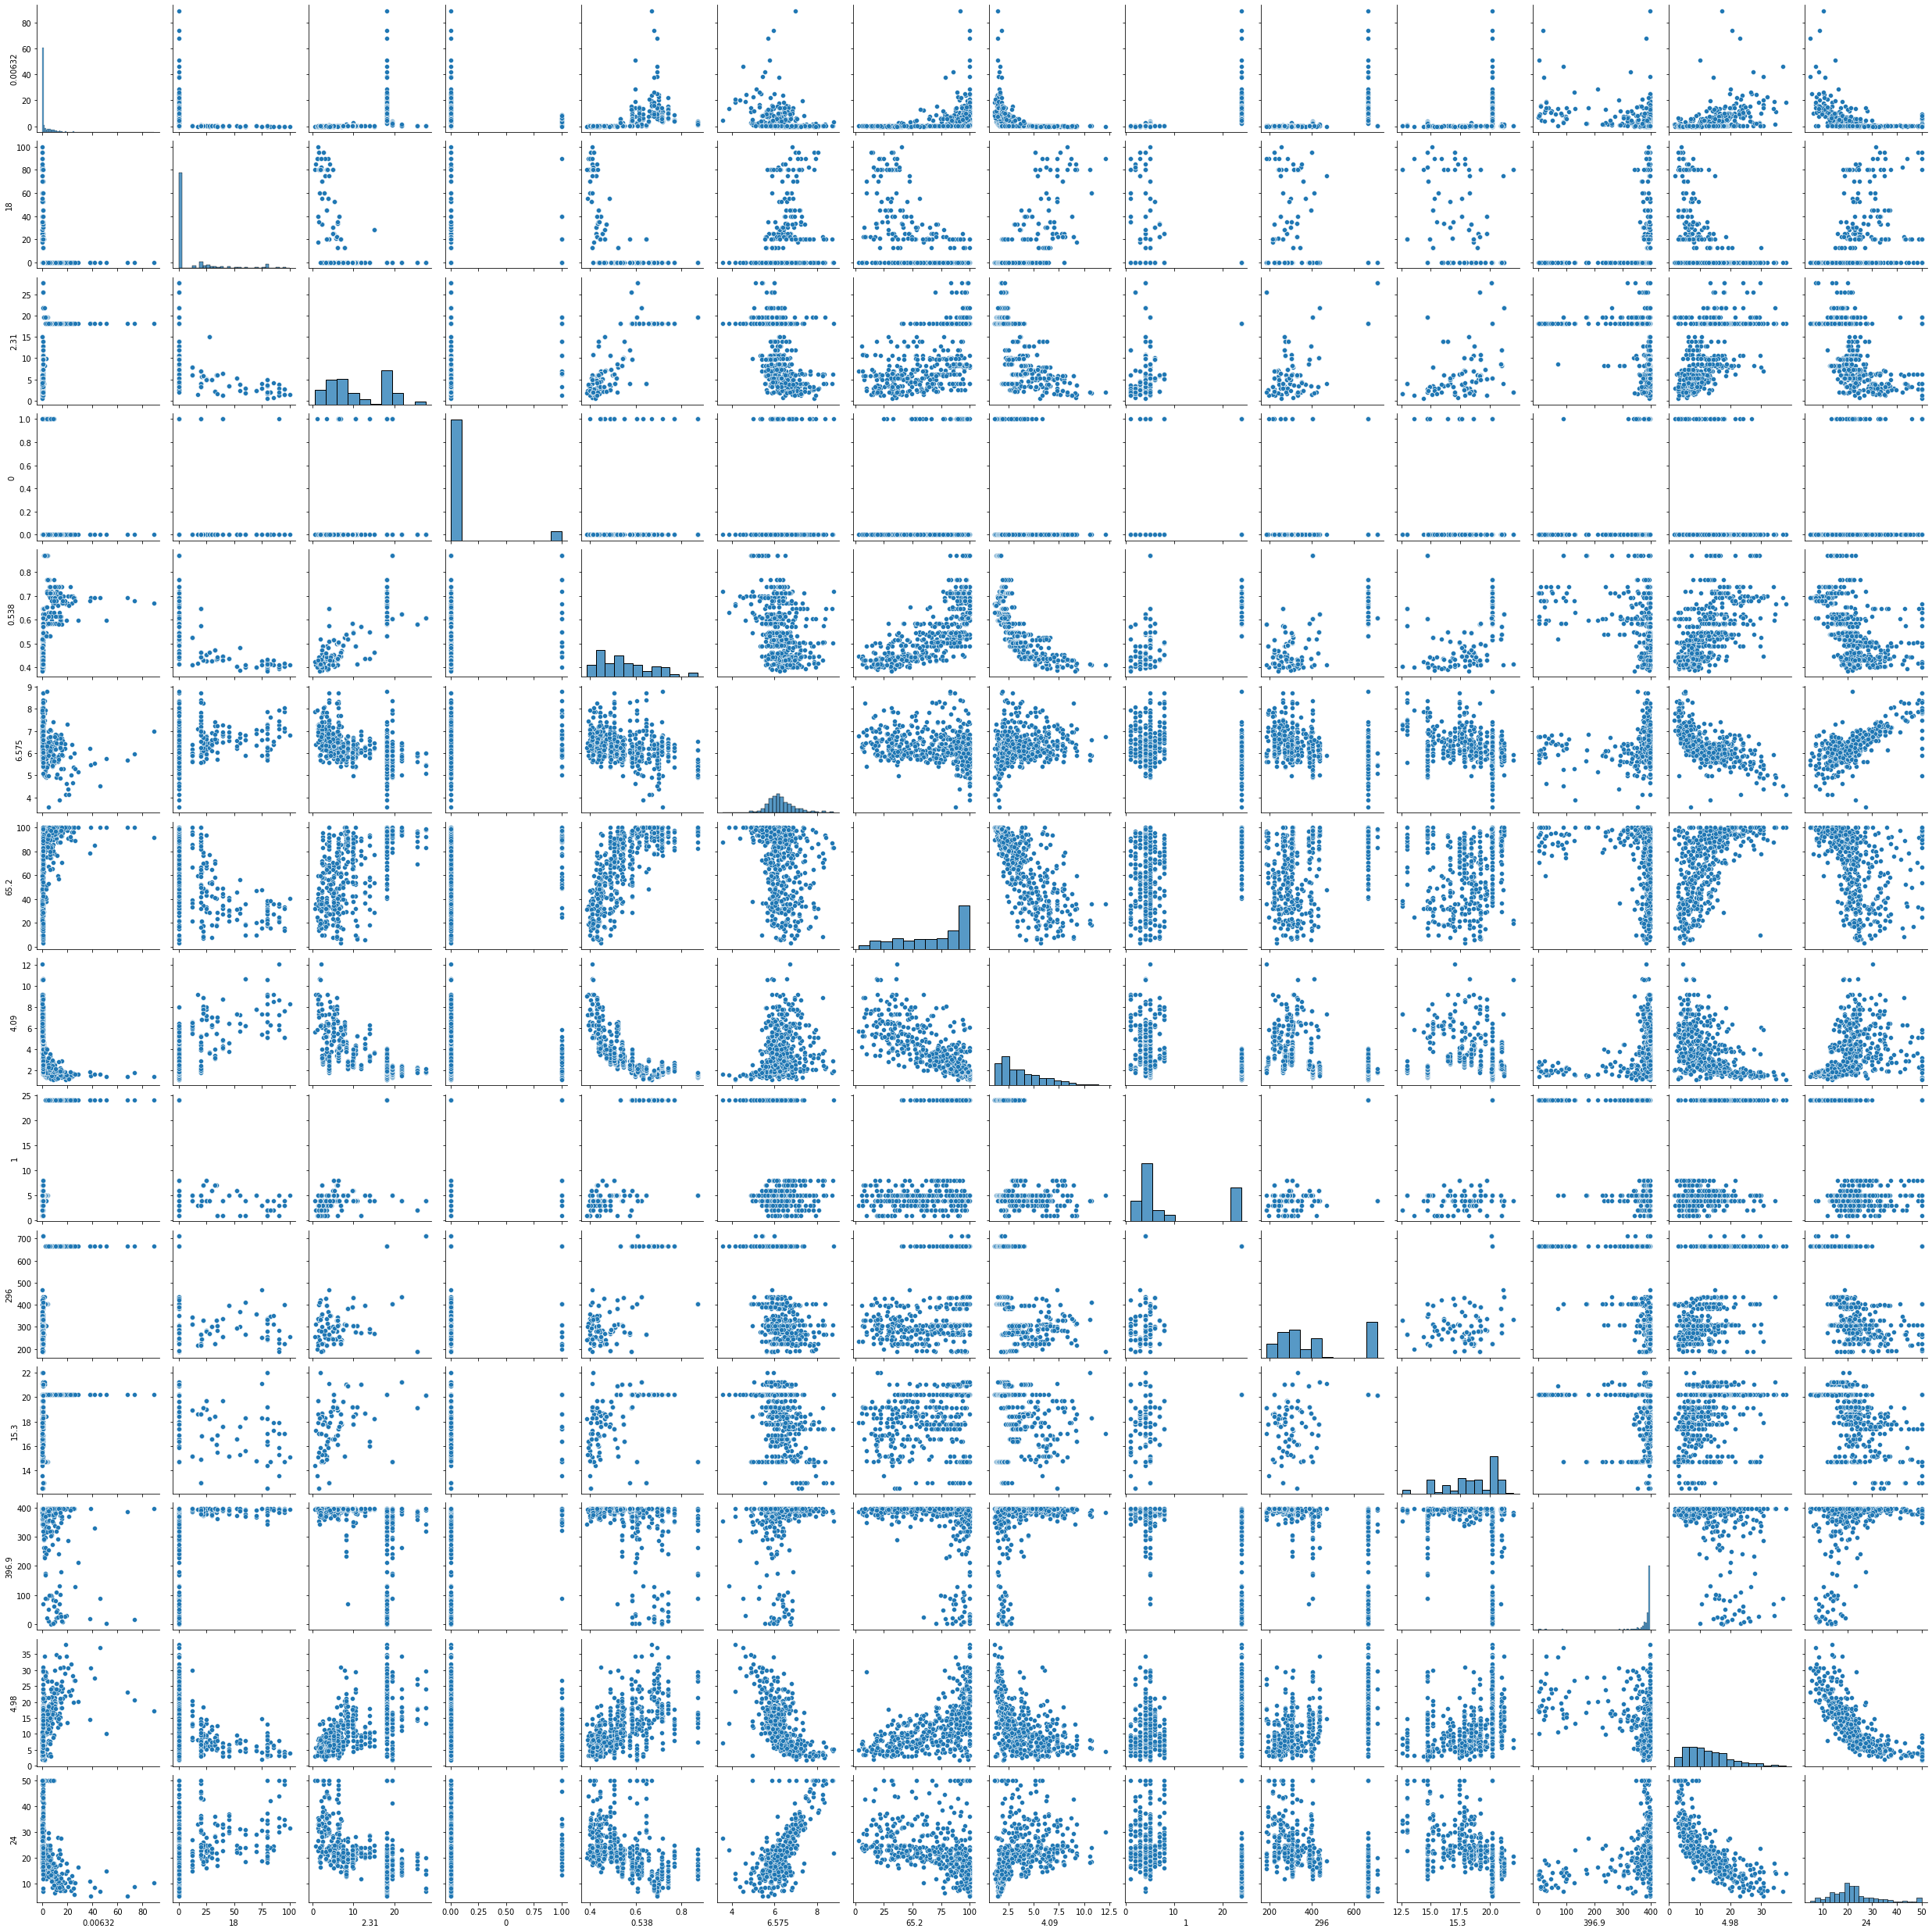

In [4]:
sns.pairplot(dataset)

In [5]:
# Extract features (X) and target variable (y) from the dataset
X=dataset.iloc[:,0:13]
y=dataset.iloc[:,13].values

In [6]:
# Data preprocessing: Scale the features and target variable to a range between 0 and 1

from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X= sc.fit_transform(X)
y= y.reshape(-1,1)
y=sc.fit_transform(y)

In [7]:
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
# Define the neural network model using Keras

from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=13, input_dim=13))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor


In [9]:
# Create a KerasRegressor using the defined neural network model

from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=100)

<ipython-input-9-da90173b8536>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=100)


In [10]:
# Train the neural network on the training data
results=regressor.fit(X_train,y_train)

Epoch 1/100
12/12 [==============================] - 1s 6ms/step - loss: 0.7949 - mae: 0.8476 - accuracy: 0.0057
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3435 - mae: 0.5212 - accuracy: 0.0057
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1412 - mae: 0.2878 - accuracy: 0.0142
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0854 - mae: 0.2214 - accuracy: 0.0142
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0783 - mae: 0.2175 - accuracy: 0.0227
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0724 - mae: 0.2059 - accuracy: 0.0198
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0682 - mae: 0.1964 - accuracy: 0.0170
Epoch 8/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0651 - mae: 0.1904 - accuracy: 0.0170
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0625 - mae: 0.1877 - 

In [11]:
# Make predictions on the test data using the trained model
y_pred= regressor.predict(X_test)

5/5 [==============================] - 0s 2ms/step


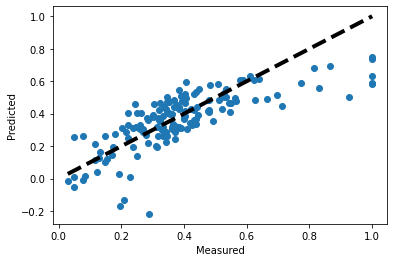

In [12]:
# Visualize the predicted vs. actual values using a scatter plot
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()